<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks/blob/main/mumax3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mumax3 in google colaboratory**

# About Google colaboratory

Google colaboratory is a research tool mainly used by researchers in the field of machine learning. The main purpose of this tool is to run python code in jupyter notebooks. These notebooks run on a virtual linux machine private to your gmail account. This means that you will need a gmail account to execute programs in a google colaboratory session. If you have a gmail account you should be able to copy this jupyter notebook to your google drive and execute the code cells.

To run mumax3 simulations, you do not need to write any python code. So you might wonder how we can use this jupyter notebook environment to run mumax3 simulations. The trick here is that you can execute shell commands by typing an exclamation mark followed by the command, as shown in the code cell below. If you run this code cell, the shell will print out the operating system of the virtual machine. Having the ability to run shell commands suffices to install and run mumax3 simulations, as demonstrated in the sections below.

In [9]:
! echo "This machine runs" $(uname)

This machine runs Linux


In [1]:
!pip install ubermag

# Installing mumax3

To install mumax3.10 on this virtual machine, you can run the cell below. This might take a few minutes. When the installation is done, you can collapse this section to get a clean workspace.

In [2]:
# Download the mumax3 binary
!wget https://mumax.ugent.be/mumax3-binaries/mumax3.10_linux_cuda10.1.tar.gz
!tar -xvf mumax3.10_linux_cuda10.1.tar.gz
!rm mumax3.10_linux_cuda10.1.tar.gz
!rm -rf mumax3.10 && mv mumax3.10_linux_cuda10.1 mumax3.10

#update the PATH environment variable
import os
os.environ['PATH'] += ":/content/mumax3.10"

# Download an examplary script
!wget https://raw.githubusercontent.com/JeroenMulkers/mumax3-tutorial/master/standardproblem4.mx3 -O standardproblem4.mx3

--2023-11-25 08:21:17--  https://mumax.ugent.be/mumax3-binaries/mumax3.10_linux_cuda10.1.tar.gz
Resolving mumax.ugent.be (mumax.ugent.be)... 157.193.40.77
Connecting to mumax.ugent.be (mumax.ugent.be)|157.193.40.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150707207 (144M) [application/x-gzip]
Saving to: ‘mumax3.10_linux_cuda10.1.tar.gz’

mumax3.10_linux_cud 100%[===================>] 143.73M  35.1MB/s    in 4.8s    

2023-11-25 08:21:23 (29.8 MB/s) - ‘mumax3.10_linux_cuda10.1.tar.gz’ saved [150707207/150707207]

mumax3.10_linux_cuda10.1/
mumax3.10_linux_cuda10.1/mumax3-server
mumax3.10_linux_cuda10.1/lib/
mumax3.10_linux_cuda10.1/lib/libcurand.so.10
mumax3.10_linux_cuda10.1/lib/libcufft.so.10
mumax3.10_linux_cuda10.1/mumax3
mumax3.10_linux_cuda10.1/LICENSE
mumax3.10_linux_cuda10.1/mumax3-convert
--2023-11-25 08:21:25--  https://raw.githubusercontent.com/JeroenMulkers/mumax3-tutorial/master/standardproblem4.mx3
Resolving raw.githubusercontent.com (raw.gi

# Running a mumax3 script

You can open the filebrowser for this virtual machine on the left side of this page. Here you should see a mumax3 script named standardproblem4.mx3. You should be able to open this file with a double click. To execute the script run the code cell below.

In [3]:
!mumax3 standardproblem4.mx3

//mumax 3.10 [linux_amd64 go1.14(gc) CUDA-10.1]
//GPU info: Tesla T4(15101MB), CUDA Driver 12.0, cc=7.5, using cc=75 PTX
//(c) Arne Vansteenkiste, Dynamat LAB, Ghent University, Belgium
//This is free software without any warranty. See license.txt
//********************************************************************//
//  If you use mumax in any work or publication,                      //
//  we kindly ask you to cite the references in references.bib        //
//********************************************************************//
//output directory: standardproblem4.out/
//starting GUI at http://127.0.0.1:35367
SetGridsize(128, 32, 1)
SetCellsize(500e-9/128, 125e-9/32, 3e-9)
Msat = 800e3
Aex = 13e-12
alpha = 0.02
m = uniform(1, .1, 0)
relax()
//Using cached kernel: /tmp/mumax3kernel_[128 32 1]_[0 0 0]_[3.90625e-09 3.90625e-09 3e-09]_6_
save(m)
autosave(m, 200e-12)
tableautosave(10e-12)
B_ext = vector(-24.6E-3, 4.3E-3, 0)
run(1e-9)
//*************************************************

If you ran the cell above, then there should be a directory named standardproblem4.out (you might need to click on the refresh button in the filebrowser). This directory contains the output files of the simulation. mumax3-convert can now be used to convert the ovf files to images, as demonstrated in the cell below.

In [4]:
!mumax3-convert -png standardproblem4.out/*.ovf

standardproblem4.out/m000000.ovf
standardproblem4.out/m000001.ovf
standardproblem4.out/m000002.ovf
standardproblem4.out/m000003.ovf
standardproblem4.out/m000004.ovf
standardproblem4.out/m000005.ovf
standardproblem4.out/m000006.ovf
[ ok ] standardproblem4.out/m000001.ovf	-> standardproblem4.out/m000001.png
[ ok ] standardproblem4.out/m000000.ovf	-> standardproblem4.out/m000000.png
[ ok ] standardproblem4.out/m000003.ovf	-> standardproblem4.out/m000003.png
[ ok ] standardproblem4.out/m000002.ovf	-> standardproblem4.out/m000002.png
[ ok ] standardproblem4.out/m000005.ovf	-> standardproblem4.out/m000005.png
[ ok ] standardproblem4.out/m000004.ovf	-> standardproblem4.out/m000004.png
[ ok ] standardproblem4.out/m000006.ovf	-> standardproblem4.out/m000006.png
7 files converted,  0 skipped,  0 failed


Now it's up to you. Right click on the filebrowser to add a new file. Open the file and write your first mumax3 script. Run this script as demonstrated above.

In [5]:
# Some initial configurations
%config InlineBackend.figure_formats = ['svg']  # output matplotlib plots as SVG
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 5
pd.options.display.float_format = '{:,.2e}'.format

In [6]:
import discretisedfield as df
import micromagneticmodel as mm

# Geometry
r = 50e-9  # Radius of the thin nano magnetic disk (m)
thickness = 10e-9  # sample thickness (m)

# Material (Permalloy) parameters
Ms = 8e5  # saturation magnetisation (A/m)
A = 13e-12  # exchange energy constant (J/m)

# Dynamics (LLG equation) parameters
gamma0 = mm.consts.gamma0  # gyromagnetic ratio (m/As)
alpha = 0.05  # Gilbert damping

system = mm.System(name='vortex_dynamics')

# Energy equation. We omit Zeeman energy term, because H=0.
system.energy = mm.Exchange(A=A) + mm.Demag()

# Dynamics equation
system.dynamics = mm.Precession(gamma0=gamma0) + mm.Damping(alpha=alpha)


# initial magnetisation state
def m_init(point):
    x, y, _ = point
    c = 1e9  # (1/m)
    return (-c*y, c*x, 0.1)


# Defining the geometry of the material as a circular disk
def Ms_func(point):
    x, y, _ = point
    if x**2 + y**2 <= r**2:
        return Ms
    else:
        return 0


# Sample's centre is placed at origin
region = df.Region(p1=(-r, -r, -thickness/2), p2=(r, r, thickness/2))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 10e-9))

system.m = df.Field(mesh, nvdim=3, value=m_init, norm=Ms_func, valid='norm')

In [7]:
system.energy

Exchange(A=1.3e-11) + Demag()

In [8]:
system.dynamics

Precession(gamma0=221276.14872118403) + Damping(alpha=0.05)

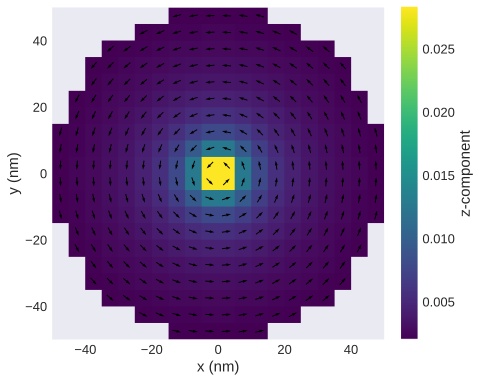

In [9]:
system.m.orientation.sel('z').mpl()